In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('spam_clean.csv',encoding='latin-1')

In [ ]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='type', ylabel='count'>

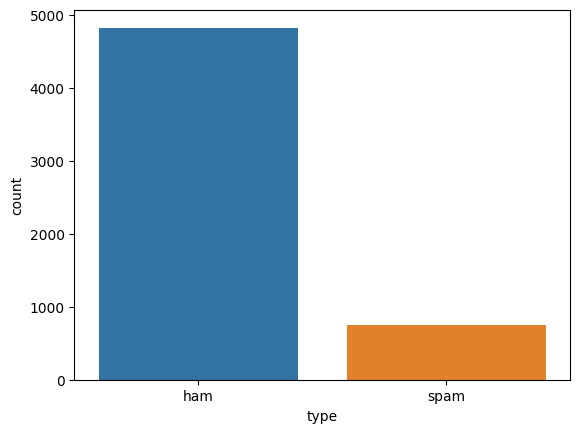

In [ ]:
sns.countplot(x=df['type'])

In [ ]:
df['type'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: type, dtype: float64

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
def clean_tokenized_sentence(s):
  cleaned_s=''
  words=nltk.word_tokenize(s)
  for word in words:
    word=word.lower()
    word=re.sub(r'[^\w\s]','',word)
    if word=='not':
      cleaned_s=cleaned_s+' '+word
    elif word!='' and word not in stopwords.words('english'):
      cleaned_s=cleaned_s+' '+word
  return cleaned_s.strip()




In [ ]:
df['cleaned_message']=df['message'].apply(clean_tokenized_sentence)

In [ ]:
df.head(7)

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother not like speak treat like aids pa...


In [ ]:
ham_df=df[df['type']=='ham']
ham_df.head()

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
6,ham,Even my brother is not like to speak with me. ...,even brother not like speak treat like aids pa...


In [ ]:
ham=ham_df['cleaned_message']
ham=" ".join(ham)
ham

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah nt think goes usf lives around though even brother not like speak treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune gon na home soon nt want talk stuff anymore tonight k cried enough today searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday oh k watching eh u remember 2 spell name yes v naughty make v wet fine thatåõs way u feel thatåõs way gota b seriously spell name iûm going try 2 months ha ha joking ì_ pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really not hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom

In [ ]:
from collections import Counter
ham=ham.split()

In [ ]:
counter_ham=Counter(ham).most_common(30)
counter_ham

[('u', 1004),
 ('not', 417),
 ('nt', 360),
 ('gt', 318),
 ('lt', 316),
 ('2', 309),
 ('get', 303),
 ('ok', 279),
 ('go', 248),
 ('got', 244),
 ('ur', 241),
 ('know', 236),
 ('like', 231),
 ('call', 231),
 ('good', 229),
 ('come', 227),
 ('time', 197),
 ('day', 192),
 ('love', 191),
 ('4', 172),
 ('going', 169),
 ('one', 167),
 ('want', 163),
 ('lor', 162),
 ('home', 161),
 ('need', 156),
 ('sorry', 156),
 ('da', 149),
 ('still', 148),
 ('n', 139)]

In [ ]:
spam_df=df[df['type']=='spam']

In [ ]:
spam=spam_df['cleaned_message']
spam=" ".join(spam)
spam=spam.split()

In [ ]:
counter_spam=Counter(spam).most_common(30)
counter_spam

[('call', 347),
 ('free', 219),
 ('2', 176),
 ('u', 159),
 ('txt', 156),
 ('ur', 144),
 ('mobile', 123),
 ('4', 123),
 ('text', 121),
 ('stop', 116),
 ('claim', 113),
 ('reply', 104),
 ('prize', 92),
 ('get', 84),
 ('new', 69),
 ('send', 68),
 ('nokia', 65),
 ('urgent', 63),
 ('cash', 62),
 ('win', 60),
 ('contact', 56),
 ('service', 55),
 ('please', 54),
 ('week', 53),
 ('c', 52),
 ('guaranteed', 50),
 ('customer', 49),
 ('16', 49),
 ('tone', 48),
 ('per', 46)]

In [ ]:
spam_count_df=pd.DataFrame.from_dict(counter_spam)
spam_count_df=spam_count_df.rename(columns={0:'words',1:'count'})
spam_count_df.head()

,words,count
0,call,347
1,free,219
2,2,176
3,u,159
4,txt,156


<Axes: xlabel='words', ylabel='count'>

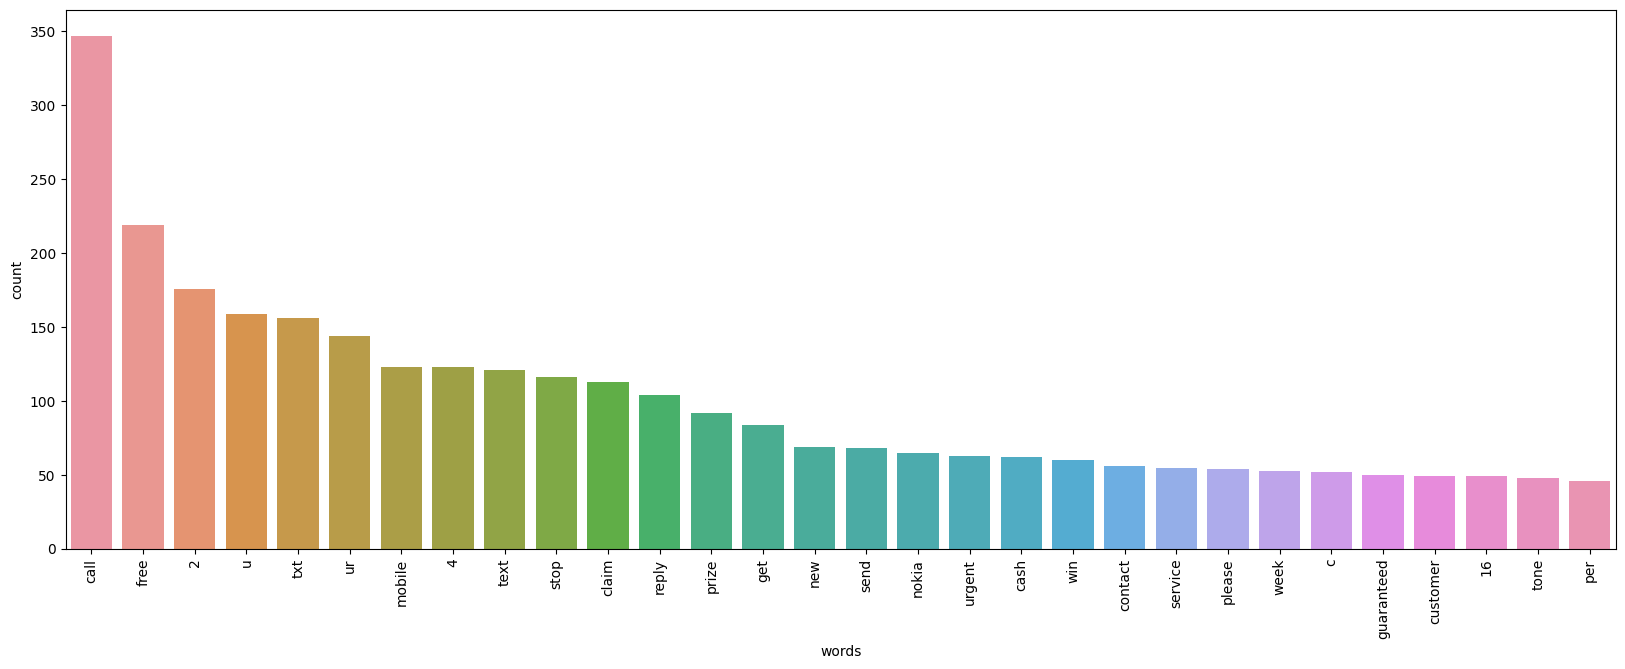

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.barplot(x=spam_count_df['words'],y=spam_count_df['count'])

In [ ]:
ham_count_df=pd.DataFrame.from_dict(counter_ham)
ham_count_df=ham_count_df.rename(columns={0:'words',1:'count'})
ham_count_df.head()

,words,count
0,u,1004
1,not,417
2,nt,360
3,gt,318
4,lt,316


<Axes: xlabel='words', ylabel='count'>

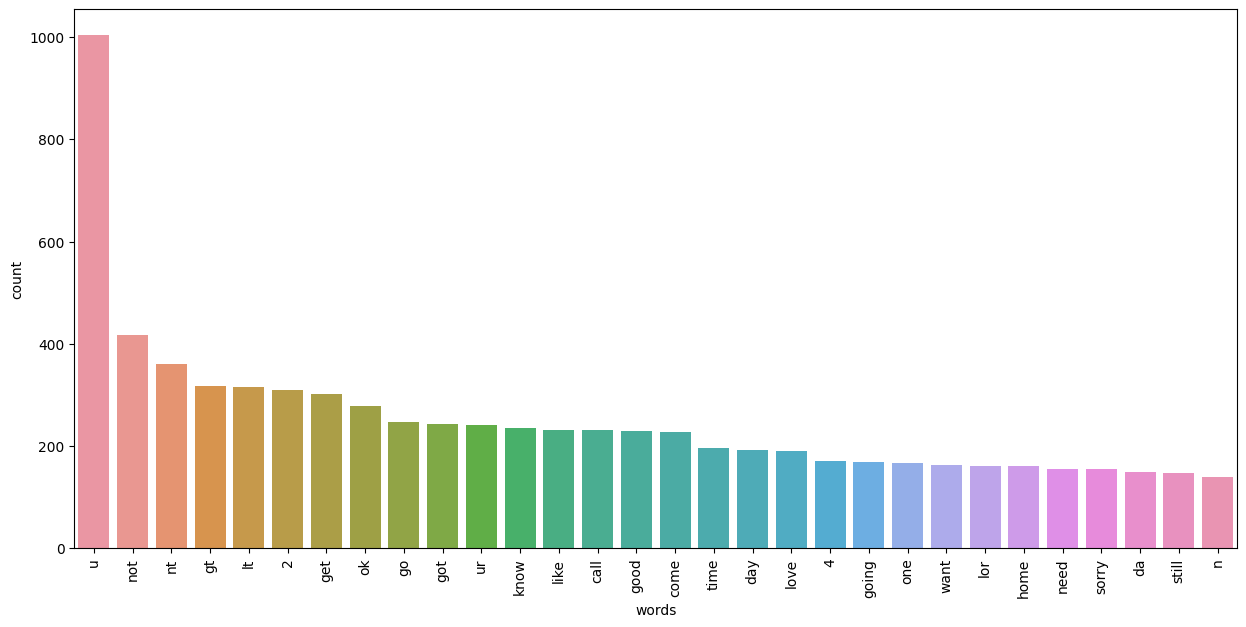

In [ ]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(x=ham_count_df['words'],y=ham_count_df['count'])

In [ ]:
df['type']=df['type'].map({'spam':1,'ham':0})

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X=df.drop(['type','message'],axis=1)
Y=df['type']

In [ ]:
# vectorize function needs only 1 pos argument it means it can accept series ,we need to give 1 d
vec=CountVectorizer()

In [ ]:
X=vec.fit_transform(X['cleaned_message'])
X.shape

(5572, 8952)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
print(X_train.shape)
X_test.shape

(4457, 8952)


(1115, 8952)

In [ ]:
print(len(vec.get_feature_names_out()))

8952


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb=MultinomialNB()
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'alpha':[0.001,0.01,0.1,1,10,100]}
n_folds=3
model_cv=GridSearchCV(estimator=mnb,param_grid=params,cv=3,verbose=1,return_train_score=True,n_jobs=-1,scoring='accuracy')
model_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
results=model_cv.cv_results_
results=pd.DataFrame(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.014474,0.008069,0.002032,0.000266,0.001,{'alpha': 0.001},0.977793,0.973755,0.969697,0.973748,0.003305,3,0.996298,0.995961,0.996972,0.996410,0.000420
1,0.006141,0.002433,0.002163,0.000984,0.01,{'alpha': 0.01},0.975774,0.973755,0.971717,0.973749,0.001656,2,0.996298,0.995961,0.996635,0.996298,0.000275
2,0.018217,0.010416,0.003340,0.002217,0.1,{'alpha': 0.1},0.974428,0.971063,0.972391,0.972627,0.001384,4,0.996298,0.995624,0.996972,0.996298,0.000550
3,0.004467,0.000124,0.001998,0.000871,1,{'alpha': 1},0.979139,0.981157,0.974411,0.978236,0.002827,1,0.994615,0.994615,0.995962,0.995064,0.000635
4,0.007053,0.002654,0.005268,0.005242,10,{'alpha': 10},0.966353,0.970390,0.962290,0.966344,0.003307,5,0.971727,0.973410,0.976110,0.973749,0.001806
5,0.006656,0.001474,0.004371,0.001941,100,{'alpha': 100},0.893674,0.892328,0.897643,0.894549,0.002256,6,0.898014,0.899024,0.901077,0.899372,0.001274


<Axes: xlabel='param_alpha', ylabel='mean_train_score'>

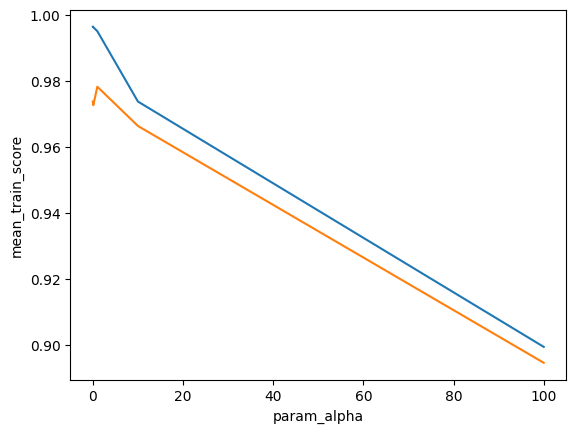

In [ ]:
sns.lineplot(x=results['param_alpha'],y=results['mean_train_score'])
sns.lineplot(x=results['param_alpha'],y=results['mean_test_score'])

In [ ]:
model_cv.best_score_

0.9782356237717386

In [ ]:
model_cv.best_params_

{'alpha': 1}

In [ ]:
mnb=MultinomialNB(alpha=1)
mnb.fit(X_train,Y_train)

MultinomialNB(alpha=1)

In [ ]:
mnb.score(X_test,Y_test)

0.9775784753363229

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE()
X_res,Y_res=sm.fit_resample(X,Y)

In [ ]:
Y_res.value_counts()

0    4825
1    4825
Name: type, dtype: int64

In [ ]:
X_res.shape

(9650, 8952)

In [ ]:
mnb=MultinomialNB(alpha=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res)

In [ ]:
params={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model_cv=GridSearchCV(mnb,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1,return_train_score=True,verbose=1)
model_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=MultinomialNB(alpha=1), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
results=pd.DataFrame(model_cv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009364,0.001881,0.002115,0.000276,0.0001,{'alpha': 0.0001},0.881906,0.863950,0.887353,0.872840,...,0.879233,0.009654,3,0.888927,0.894455,0.888774,0.894819,0.889983,0.891391,0.002685
1,0.007045,0.000980,0.002072,0.000719,0.001,{'alpha': 0.001},0.881906,0.863950,0.887353,0.873531,...,0.879372,0.009566,1,0.888582,0.894455,0.888601,0.894473,0.889465,0.891115,0.002753
2,0.006647,0.000605,0.001731,0.000090,0.01,{'alpha': 0.01},0.882597,0.863950,0.888735,0.872840,...,0.879372,0.009656,2,0.888064,0.894110,0.887910,0.894301,0.889292,0.890735,0.002874
3,0.006397,0.000396,0.001831,0.000265,0.1,{'alpha': 0.1},0.882597,0.863260,0.888735,0.872149,...,0.879095,0.009971,4,0.886854,0.892900,0.886701,0.893092,0.887565,0.889422,0.002933
4,0.008164,0.003004,0.001761,0.000162,1,{'alpha': 1},0.883287,0.859116,0.884589,0.868694,...,0.876746,0.011024,5,0.882709,0.887718,0.882383,0.887910,0.883247,0.884793,0.002483
5,0.006828,0.000947,0.001880,0.000217,10,{'alpha': 10},0.877072,0.849448,0.875605,0.854181,...,0.867488,0.013011,6,0.870271,0.878563,0.873057,0.877029,0.870812,0.873946,0.003315
6,0.008730,0.002093,0.002365,0.001031,100,{'alpha': 100},0.845304,0.827348,0.850035,0.831375,...,0.842340,0.011375,7,0.845915,0.850233,0.844387,0.848877,0.843005,0.846483,0.002706
7,0.009805,0.006064,0.002928,0.001953,1000,{'alpha': 1000},0.819061,0.813536,0.835522,0.815480,...,0.824101,0.010057,8,0.830541,0.830195,0.824180,0.828843,0.824007,0.827553,0.002882


<Axes: xlabel='param_alpha', ylabel='mean_train_score'>

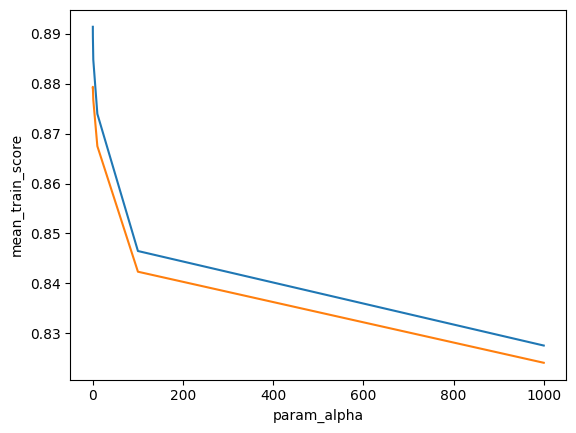

In [ ]:
sns.lineplot(x=results['param_alpha'],y=results['mean_train_score'])
sns.lineplot(x=results['param_alpha'],y=results['mean_test_score'])

##Surprisingly increasing test sample to make it balance reduces accuracy
## maybe because creating artificial data point cannot mimic the text characterstics of spam efficiently thatswhy some of them increases chances of resemblance with non spam mails so smote dont work here